
## Imports e exploração do Dataset



In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files
from math import *
import time
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import gdown
import sklearn

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Na linha abaixo tentei fazer o upload direto do google drive, mas o nome do arquivo vinha estranho, então preferi meu método tradicional de upar o arquivo

In [ ]:
gdown.download('https://drive.google.com/file/d/17UNnuEUgZyA_tGweF1_CFl3BRNA6mKZT', output=None, quiet=False)

/usr/local/lib/python3.7/dist-packages/gdown/parse_url.py:39: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  url="https://drive.google.com/uc?id={}".format(file_id)
Downloading...
From: https://drive.google.com/file/d/17UNnuEUgZyA_tGweF1_CFl3BRNA6mKZT
To: /content/17UNnuEUgZyA_tGweF1_CFl3BRNA6mKZT
67.5kB [00:00, 7.04MB/s]


'17UNnuEUgZyA_tGweF1_CFl3BRNA6mKZT'

In [ ]:
from google.colab import files

## Faça upload de um dataset com nome insurance (baixável em https://www.kaggle.com/mirichoi0218/insurance)
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
fraud = pd.read_csv('/content/creditcard.csv')
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Time é uma coluna inútil, então eu a elimino

In [ ]:
fraud = fraud.drop(columns = "Time")

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [ ]:
fraud.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


X aqui é dataset de features. Observe que logo abaixo utilizo a função scales, que normaliza o dataset.

In [ ]:
X = fraud.drop(["Class"], axis = 1)

In [ ]:
def scales(df):
  df.columns
  notObject = df.columns[df.dtypes!='object']
  #df[notObject]
  for name in notObject:
    df[name] = (df[name]-df[name].min())/(df[name].max()-df[name].min())
  return df

In [ ]:
X = scales(X)

Train-test split utilizando sklearn (supus que poderia utilizar aqui)

In [36]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,fraud["Class"], random_state = 42)

Resampling pois há poucos valores 1. Logicamente é de se esperar que apenas uma minoria das transações sejam fraudulentas. A técnica utilizada aqui foi de oversampling


In [37]:
Over = RandomOverSampler()
# resampling X, y
X_train, y_train = Over.fit_resample(X_train, y_train)

In [32]:
len(X_train)

426452

## Escrita das funções mais importantes

Todas as funções abaixo são constituídas de uma célula de definição e uma célula de teste

###1. Funções de ativação

In [ ]:
def relu(z):
    return np.maximum(0,z)

def drelu(z):
    Z = np.zeros(len(z))
    Z[z>0]=1
    Z[z<=0]=0
    return Z

In [38]:
def sig(x):
    return 1/(1+np.exp(-x))

def dsig(x):
    s = sig(x)
    return s*(1-s)

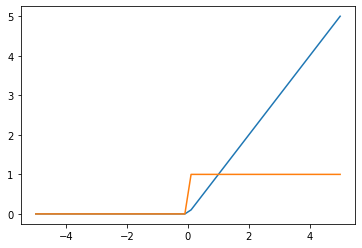

In [ ]:
a = np.linspace(-5,5,50)
y = relu(a)
dy = drelu(a)
plt.plot(a,y,a,dy)

De fato, temos as cuvas características da função relu

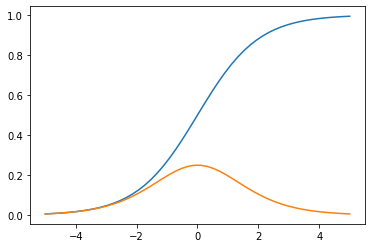

In [ ]:
y = sig(a)
dy = dsig(a)
plt.plot(a,y,a,dy)

###2. Inicialização de pesos aleatoriamento. Observe que os biases estão transpostos pois foi todo o processo é feito pensando em utilizar todas as instâncias de X_train de uma só vez em fez de utilizar um for para as instâncias (logo, teremos muitas matrizes).

In [207]:
def initialize(X, hidden = 10, outdim = 1):
  w_1 = np.random.randn(X.shape[1], hidden)
  b_1 = np.zeros((1,hidden)).T
  w_2 = np.random.randn(hidden,outdim)
  b_2 = np.zeros((1,outdim)).T
  return w_1,w_2,b_1,b_2

In [171]:
w_1, w_2, b_1, b_2 = initialize(X_train)

In [172]:
#Vendo se a inicialização está coerente. Descomente uma linha para avaliar

#print(w_1, "dim = ", np.shape(w_1))
#print(w_2, "dim = ", np.shape(w_2))
print(b_1, "dim = ", np.shape(b_1))
#print(b_2, "dim = ", np.shape(b_2))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] dim =  (10, 1)


### 3. Feed forward: Aqui uso uma notação semelhante a do 3blue1brown, onde z é o produto XW+b e a = sig(z)

In [173]:
def forward(X,y, w_1,w_2,b_1,b_2):
  z1 = X.dot(w_1)+b_1.T
  a1 = sig(z1)
  z2 = a1.dot(w_2)+b_2.T
  a2 = sig(z2)
  a2 = np.array(a2).reshape(len(y))
  return z1, z2, a1, a2

In [175]:
z1,z2,hidden,output = forward(X_train, y_train, w_1,w_2,np.ones(10),b_2) # Coloquei um b_1 diferente para testar a soma, pois soma 0 não muda nada

In [176]:
#As duas linhas abaixo devem ser descomentadas juntas para testar o efeito do bias

#print(z1, "dim = ", np.shape(z1))
#print(X_train.dot(w_1),"dim = ", np.shape(X_train.dot(w_1)))

#print(z2, "dim = ", np.shape(z2))
#print(hidden, "dim = ", np.shape(hidden))

#As linhas abaixo podem ser descomentadas juntas para entender que não há diferenças de dimensão entre o valor de output de forward e o valor das labels
#A função de soma eu só coloquei porque, à primeira vista, output tinha muitos zeros, então queria ver se só tinha zeros

print(output, "dim = ", np.shape(output))
#print(output.sum())
#print(np.shape(y_train))

[0.99336794 0.99336402 0.99336606 ... 0.9933644  0.99336203 0.99336219] dim =  (426452,)


In [177]:
output.sum()/len(output)

0.9933625373753668

In [178]:
output.min()

0.9933096685956537

Vemos que a multiplicação gera muitos outputs próximos de 1. Vejamos por que na célula abaixo. Veja que a soma ponderada entre os valores aleatórios de peso e os valores normalizados acaba resultando em valores altos (em sua maioria maiores que 5). Logo, quando passamos pela função sigmoide, é natural que esses valores fiquem próximos a 1. O mesmo ocorre para a segunda soma ponderada.

In [184]:
X_train.dot(w_1)

,0,1,2,3,4,5,6,7,8,9
0,7.825394,7.350043,7.104748,5.564708,5.702162,6.780081,6.272151,7.611237,8.040226,7.210373
1,7.608776,7.043998,6.975792,5.351247,5.676495,6.572028,6.070921,7.464313,7.965526,6.875921
2,7.838891,7.246246,6.971583,5.433304,5.666892,6.769732,6.232518,7.459764,7.859375,7.076850
3,8.105361,7.373190,7.175952,5.503701,5.753770,7.001513,6.411069,7.666252,8.016595,7.264055
4,8.039682,7.328746,7.238333,5.553919,5.696784,6.918401,6.391952,7.669209,8.118412,7.386410
...,...,...,...,...,...,...,...,...,...,...
426447,7.420595,6.520478,6.857911,4.941422,5.193632,6.040913,5.896979,6.983117,7.286571,6.969380
426448,7.183750,6.367168,6.691178,5.031639,5.196581,5.869000,5.825134,6.612903,6.750108,6.937070
426449,7.704875,7.053487,7.020070,5.357338,5.613503,6.595548,6.132767,7.523516,7.764065,6.958881
426450,7.592790,6.863505,6.998230,5.249933,5.502938,6.405256,5.990360,7.364938,7.635119,6.954194


### 4. Funções de perda
De base eu preferi usar a Mean Squared Error, que tem uma derivada mais simples. Conversando com um amigo formado na área, ele sugeriu utilizar a binary cross entropy pois a classificação é binária, porém não consegui fazer funcionar bem

In [203]:
# Para loss function, fazer MSE
def mse(X,y_hat, y):
  return np.square(y_hat-y).sum()

In [186]:
cost = mse(X_train, output, y_train)
cost

210416.23798117213

In [187]:
def bin_cross_entropy(y_hat, y):
  i = np.where(y==0)
  y_hat[i] = 1 - y_hat[i]
  return -np.mean(np.log(y_hat))

In [188]:
def dbin_cross_entropy(y_hat, y):
  i = np.where(y==0)
  y_hat[i] = 1 - y_hat[i]
  return -1/y_hat

### 5. Back propagation

Essa foi a parte mais desafiadora, e provavelmente incorreta. Eu utilizei como base o código disponibilizado em https://trinket.io/python3/46f661f6b7, mas com notações coerentes com o vídeo do 3blue1brown (dCda_2 por exemplo que dizer derivada da função de custo por a2). No entanto, no código do site que uso como referência, o autor "absorve" o viês para dentro de X, e logo não tem que atualizá-lo da mesma maneira que os pesos. Isso acabou resultando em um problema de dimensionalidade para o meu b_2. EU tentei uma solução que parecia coerente (utilizando a lógica de soma do vídeo do 3blue1brown, não sei se está correto). Mas bem, segue o código.

In [204]:
def backprop(X, y, z1, z2, a1, a2, w_1, w_2, b_1, b_2, lr):
#X, y, lr = X_train, y_train, 0.1

    #Backprop to hidden layer
    dCda_2 = 2.0 * (a2-y) /len(X)
    #dCda_2 = dbin_cross_entropy(output,y)  # caso usar cross entropy 
    da_2dz_2 = dsig(z2)           
    da_2dz_2= np.array(da_2dz_2).reshape(len(da_2dz_2))
    dz_2dw_2 = a1            
    dCdw_2= dz_2dw_2.T.dot(dCda_2*da_2dz_2) 
    dCdb_2 = dCda_2.T.dot(da_2dz_2)

    #backprop to input layer

    aux = dCda_2*da_2dz_2
    aux = np.array(aux).reshape(len(aux),1)
    dCda_1 = (aux).dot(w_2.T)
    #dCda_1 =w_2.dot(aux.T)
    da_1dz_1 = dsig(z1)
    #dw_1_part_2 = np.array(dw_1_part_2).reshape(len(dw_1_part_1))
    dz_1dw_1 = X
    dCdw_1 = dz_1dw_1.T.dot(dCda_1*da_1dz_1)
    dCdb_1 = da_1dz_1.T.dot(dCda_1).sum(axis=0)

    #Atualização de pesos e biases

    w_2 = w_2 - lr*np.array(dCdw_2).reshape(len(dCdw_2),1)
    w_1 = w_1 - lr*dCdw_1
    b_2 = b_2 - lr*dCdb_2
    b_1 = b_1 - lr*np.array(dCdb_1).reshape(len(dCdb_1),1)

    return w_1, w_2, b_1, b_2

In [191]:
w_1, w_2, b_1, b_2 = backprop(X_train, y_train, z1,z2,hidden, output,w_1,w_2,b_1,b_2, 0.1)

In [201]:
#Vendo se a atualização está coerente. Descomente uma linha para avaliar

#print(w_1, "dim = ", np.shape(w_1))
#print(w_2, "dim = ", np.shape(w_2))
#print(b_1, "dim = ", np.shape(b_1))
print(b_2, "dim = ", np.shape(b_2))

[[-0.00065012]] dim =  (1, 1)


Vemos que os vieses são levemente atualizados

### 6. Juntando tudo em uma rede neural

Abaixo temos a função que junta tudo em uma rede neural com várias épocas.

In [208]:
def ANN(X,y, hiddenNodes = 10, epochs = 100, lr =0.1):
#X,y, hiddenNodes, epochs , lr = X_train, y_train, 10, 100,0.1
    w_1,w_2,b_1,b_2 = initialize(X, hiddenNodes)
    for iter in range(epochs):
      z1,z2,hidden,output = forward(X_train, y_train, w_1,w_2,b_1,b_2)
      cost = mse(X,output,y)
      #cost = bin_cross_entropy(output,y)
      w_1, w_2, b_1, b_2 = backprop(X, y, z1, z2,hidden, output, w_1, w_2, b_1, b_2,lr)
      print ("epoch: ", iter, "total loss: ", cost)
    return w_1, w_2, b_1, b_2

### 7. Treinando uma rede neural

Abaixo rodamos a função ANN no dataset de traino. Vemos que o valor de custo abaixa com cada iteração



In [209]:
W_1, W_2, B_1, B_2 = ANN(X_train,y_train)

epoch:  0 total loss:  140417.4464442154
epoch:  1 total loss:  137219.94635710452
epoch:  2 total loss:  134110.49706175431
epoch:  3 total loss:  131125.66830413928
epoch:  4 total loss:  128297.26251922775
epoch:  5 total loss:  125650.5561799503
epoch:  6 total loss:  123203.22278290386
epoch:  7 total loss:  120965.02785882086
epoch:  8 total loss:  118938.24583909777
epoch:  9 total loss:  117118.63791409462
epoch:  10 total loss:  115496.77265379559
epoch:  11 total loss:  114059.46939215595
epoch:  12 total loss:  112791.18380203599
epoch:  13 total loss:  111675.21442596926
epoch:  14 total loss:  110694.66904263361
epoch:  15 total loss:  109833.17848116088
epoch:  16 total loss:  109075.37817631263
epoch:  17 total loss:  108407.19515930067
epoch:  18 total loss:  107815.98383749026
epoch:  19 total loss:  107290.55200445818
epoch:  20 total loss:  106821.11263375808
epoch:  21 total loss:  106399.18971395984
epoch:  22 total loss:  106017.49924551048
epoch:  23 total loss: 

In [210]:
z1, z2, hidden, output = forward(X_test,y_test, W_1,B_1,W_2,B_2)

In [211]:
output

array([0.41803495, 0.41840687, 0.41751025, ..., 0.41683106, 0.41478745,
       0.4145662 ])

Aqui vemos que o output simplesmente não é coerente. A função sigmoide nos entrega um float, e por consequência, o output também o é. Não consegui entender bem como faria para poder fazer uma lógica de arredondamento e poder tornar a classificação binária.

In [212]:
y_test

43428     1
49906     0
29474     0
276481    0
278846    0
         ..
234953    0
235147    0
199459    0
172357    0
110731    0
Name: Class, Length: 71202, dtype: int64

In [214]:
mse(X_test,y_test, output)

12365.692291815169

Finalmente, como não consegui deixar a rede neural funcional, não foi possível avançar nos outros elementos do período.